In [1]:
import os
import pandas as pd
file_path = 'PODA Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        193 non-null    object 
 1   Year                           193 non-null    int64  
 2   Total Population               193 non-null    int64  
 3   Urban Population               193 non-null    object 
 4   Rural Population               193 non-null    object 
 5   Life Expectancy                193 non-null    int64  
 6   Birth Rate                     193 non-null    float64
 7   Death Rate                     193 non-null    float64
 8   Fertility Rate                 193 non-null    float64
 9   Infant Mortality Rate          193 non-null    object 
 10  Growth Rate                    193 non-null    int64  
 11  GDP (current US$)              193 non-null    float64
 12  GDP (current US$ 100 Million)  193 non-null    flo

In [2]:
columns_to_delete = ["Year","Total Population","Urban Population","Rural Population",
                     "Death Rate","Fertility Rate","Infant Mortality Rate","Growth Rate","GDP (current US$)","GDP (current US$ 100 Million)"]
df = df.drop(columns = columns_to_delete)
df = df.dropna()
print(df)

                 Country  Life Expectancy  Birth Rate
0            Afghanistan               62      35.842
1                Albania               76      10.240
2                Algeria               76      21.524
3                 Angola               62      38.809
4    Antigua And Barbuda               78      12.115
..                   ...              ...         ...
188              Vanuatu               70      29.438
189              Vietnam               74      15.008
190   West Bank And Gaza               73      28.236
191               Zambia               61      34.511
192             Zimbabwe               59      30.537

[193 rows x 3 columns]


In [3]:
from tabulate import tabulate
first_row = ["Life Expectancy","Birth Rate"]
print(tabulate(df.describe(), headers=first_row, tablefmt='fancy_grid'))
print (df.describe())

╒═══════╤═══════════════════╤══════════════╕
│       │   Life Expectancy │   Birth Rate │
╞═══════╪═══════════════════╪══════════════╡
│ count │         193       │    193       │
├───────┼───────────────────┼──────────────┤
│ mean  │          71.3109  │     18.66    │
├───────┼───────────────────┼──────────────┤
│ std   │           9.17178 │      9.66323 │
├───────┼───────────────────┼──────────────┤
│ min   │           0       │      5       │
├───────┼───────────────────┼──────────────┤
│ 25%   │          66       │     10.5     │
├───────┼───────────────────┼──────────────┤
│ 50%   │          72       │     16.025   │
├───────┼───────────────────┼──────────────┤
│ 75%   │          77       │     25.9     │
├───────┼───────────────────┼──────────────┤
│ max   │          85       │     45.293   │
╘═══════╧═══════════════════╧══════════════╛
       Life Expectancy  Birth Rate
count       193.000000  193.000000
mean         71.310881   18.660031
std           9.171783    9.663226
min  

In [4]:
import statistics

print('variance for Life Expectancy is',statistics.variance(df['Life Expectancy']))
print('variance for Birth Rate is',statistics.variance(df['Birth Rate']))
print('variance is for GDP(current US$ 100 Million)',statistics.variance(df['GDP (current US$ 100 Million)']))

variance for Life Expectancy is 84.12159974093264
variance for Birth Rate is 93.37793175944516


KeyError: 'GDP (current US$ 100 Million)'

In [5]:
print('standard deviation for Life Expectancy is',statistics.stdev(df['Life Expectancy']))
print('standard deviation for Birth Rate is',statistics.stdev(df['Birth Rate']))
#print('standard deviation is for GDP(current US$ 100 Million)',statistics.stdev(df['GDP (current US$ 100 Million)']))

standard deviation for Life Expectancy is 9.171782800575505
standard deviation for Birth Rate is 9.663225742962085


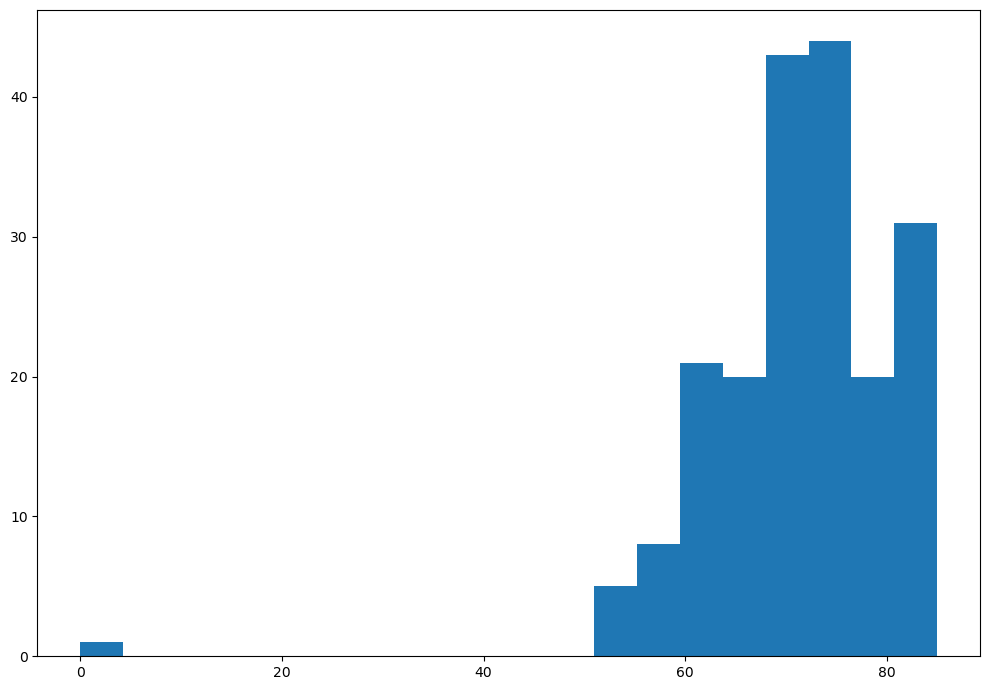

In [6]:
#Assumptions for 2 way ANOVA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
'''
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(LE, bins = [0, 25, 50, 75, 100])
'''
LE = np.array(df['Life Expectancy'])
n_bins = 20
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7), 
                        tight_layout = True)
 
axs.hist(LE, bins = n_bins)

plt.show()
              



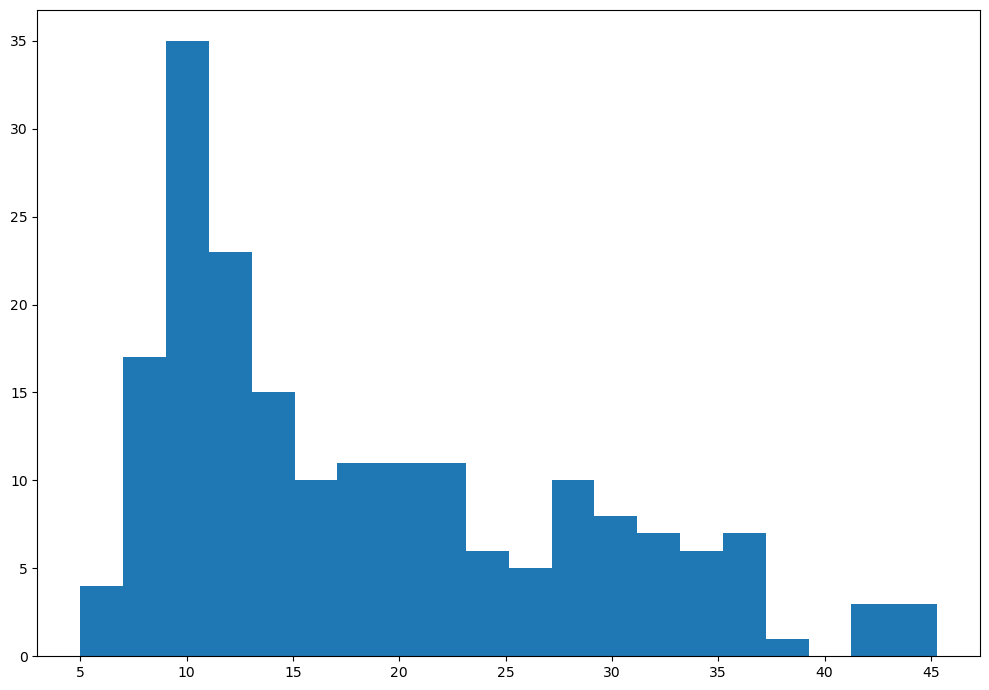

In [7]:
BR = np.array(df['Birth Rate'])
'''fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(BR, bins = [0, 25, 50, 75, 100])
'''
n_bins = 20
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7), 
                        tight_layout = True)
 
axs.hist(BR, bins = n_bins)

plt.show()


In [8]:
'''
GDP = np.array(df['GDP (current US$ 100 Million)'])
n_bins = 20
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7), 
                        tight_layout = True)
 
axs.hist(GDP, bins = n_bins)


fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(GDP, bins = [0, 25, 50, 75, 100])
plt.show()
'''


"\nGDP = np.array(df['GDP (current US$ 100 Million)'])\nn_bins = 20\nfig, axs = plt.subplots(1, 1,\n                        figsize =(10, 7), \n                        tight_layout = True)\n \naxs.hist(GDP, bins = n_bins)\n\n\nfig, ax = plt.subplots(figsize =(10, 7))\nax.hist(GDP, bins = [0, 25, 50, 75, 100])\nplt.show()\n"

In [9]:
#CHI SQUARED TEST
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

Group1= np.array(df['Life Expectancy'])
mean_G=np.zeros((3,1))
var_G=np.zeros((3,1))

#ddof is delta degree of freedom, ddof=1: using sample mean formula
mean_G[0,0]= np.mean(Group1)
var_G[0,0]= np.var(Group1,ddof=1)

#Let the number of bins be 6, so we devide the PDF of N~(mean_G1/2/3,var_G1/2/3) into 6 regions of equal probability.
#large number of bins, better approximation of normal distribution
#6 here is because our sample data is a relatively small.
#Cutoffs for those bins can be found via the inverse function of CDF
#6 bins require 5 cutoffs.
Bin_Cutoff=np.zeros((5,3))
for i in range(5):
    for j in range(3):
        Bin_Cutoff[i,j]=sts.norm.ppf((i+1)/14,loc=mean_G[j,0],scale=np.sqrt(var_G[j,0]))

#all bins have equal probabilities, the sum is 1.
Expected_Relative_Freq=np.ones((14,3))*1/14

#Compute the observed absolute frequency for each bin by counting the number of sample points in each bin
Observed_Absolute_Freq=np.zeros((14,3))
Observed_Absolute_Freq[0,0]=len(np.where(Group1 <= Bin_Cutoff[0,0])[0])


for i in range(1,5):
    Observed_Absolute_Freq[i,0]=len(np.where(Group1 <= Bin_Cutoff[i,0])[0])-np.sum(Observed_Absolute_Freq[0:i,0])
    Observed_Absolute_Freq[5,0]=len(Group1)-np.sum(Observed_Absolute_Freq[0:5,0])


#Compute the expected absolute frequency for each bin: bin probability x sample size of each group
Expected_Absolute_Freq=np.zeros((14,3))
Expected_Absolute_Freq[:,0]=Expected_Relative_Freq[:,0]*len(Group1)


#compute p value for each group by using chi square goodness of fit test;ddof=2: we lost 2 degrees of freedom when estimating population mean and varaince
print('p-value is', sts.chisquare(Observed_Absolute_Freq[:,0],Expected_Absolute_Freq[:,0],ddof=2)[1])
print('null hypothesis for group Life Expectancy should be rejected, as p-value < 5% ')


p-value is 1.8776636446682398e-259
null hypothesis for group Life Expectancy should be rejected, as p-value < 5% 


/opt/conda/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/opt/conda/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [10]:
Group2= np.array(df['Birth Rate'])
mean_G=np.zeros((3,1))
var_G=np.zeros((3,1))

#ddof is delta degree of freedom, ddof=1: using sample mean formula
mean_G[0,0]= np.mean(Group2)
var_G[0,0]= np.var(Group2,ddof=1)

#Let the number of bins be 6, so we devide the PDF of N~(mean_G1/2/3,var_G1/2/3) into 6 regions of equal probability.
#large number of bins, better approximation of normal distribution
#6 here is because our sample data is a relatively small.
#Cutoffs for those bins can be found via the inverse function of CDF
#6 bins require 5 cutoffs.
Bin_Cutoff=np.zeros((5,3))
for i in range(5):
    for j in range(3):
        Bin_Cutoff[i,j]=sts.norm.ppf((i+1)/14,loc=mean_G[j,0],scale=np.sqrt(var_G[j,0]))

#all bins have equal probabilities, the sum is 1.
Expected_Relative_Freq=np.ones((14,3))*1/14

#Compute the observed absolute frequency for each bin by counting the number of sample points in each bin
Observed_Absolute_Freq=np.zeros((14,3))
Observed_Absolute_Freq[0,0]=len(np.where(Group2 <= Bin_Cutoff[0,0])[0])


for i in range(1,5):
    Observed_Absolute_Freq[i,0]=len(np.where(Group2 <= Bin_Cutoff[i,0])[0])-np.sum(Observed_Absolute_Freq[0:i,0])
    Observed_Absolute_Freq[5,0]=len(Group2)-np.sum(Observed_Absolute_Freq[0:5,0])


#Compute the expected absolute frequency for each bin: bin probability x sample size of each group
Expected_Absolute_Freq=np.zeros((14,3))
Expected_Absolute_Freq[:,0]=Expected_Relative_Freq[:,0]*len(Group2)


#compute p value for each group by using chi square goodness of fit test;ddof=2: we lost 2 degrees of freedom when estimating population mean and varaince
print('p-value is', sts.chisquare(Observed_Absolute_Freq[:,0],Expected_Absolute_Freq[:,0],ddof=2)[1])
print('null hypothesis for group Birth Rate should be rejected, as p-value < 5% ')


p-value is 2.5541555932318646e-148
null hypothesis for group Birth Rate should be rejected, as p-value < 5% 


In [11]:
'''Group3= np.array(df['GDP (current US$ 100 Million)'])
mean_G=np.zeros((3,1))
var_G=np.zeros((3,1))

#ddof is delta degree of freedom, ddof=1: using sample mean formula
mean_G[0,0]= np.mean(Group3)
var_G[0,0]= np.var(Group3,ddof=1)

#Let the number of bins be 6, so we devide the PDF of N~(mean_G1/2/3,var_G1/2/3) into 6 regions of equal probability.
#large number of bins, better approximation of normal distribution
#6 here is because our sample data is a relatively small.
#Cutoffs for those bins can be found via the inverse function of CDF
#6 bins require 5 cutoffs.
Bin_Cutoff=np.zeros((5,3))
for i in range(5):
    for j in range(3):
        Bin_Cutoff[i,j]=sts.norm.ppf((i+1)/14,loc=mean_G[j,0],scale=np.sqrt(var_G[j,0]))

#all bins have equal probabilities, the sum is 1.
Expected_Relative_Freq=np.ones((14,3))*1/14

#Compute the observed absolute frequency for each bin by counting the number of sample points in each bin
Observed_Absolute_Freq=np.zeros((14,3))
Observed_Absolute_Freq[0,0]=len(np.where(Group3 <= Bin_Cutoff[0,0])[0])


for i in range(1,5):
    Observed_Absolute_Freq[i,0]=len(np.where(Group3 <= Bin_Cutoff[i,0])[0])-np.sum(Observed_Absolute_Freq[0:i,0])
    Observed_Absolute_Freq[5,0]=len(Group3)-np.sum(Observed_Absolute_Freq[0:5,0])


#Compute the expected absolute frequency for each bin: bin probability x sample size of each group
Expected_Absolute_Freq=np.zeros((14,3))
Expected_Absolute_Freq[:,0]=Expected_Relative_Freq[:,0]*len(Group3)


#compute p value for each group by using chi square goodness of fit test;ddof=2: we lost 2 degrees of freedom when estimating population mean and varaince
print('p-value is', sts.chisquare(Observed_Absolute_Freq[:,0],Expected_Absolute_Freq[:,0],ddof=2)[1])
print('null hypothesis for group Birth Rate should be rejected, as p-value< 5% ')
'''

"Group3= np.array(df['GDP (current US$ 100 Million)'])\nmean_G=np.zeros((3,1))\nvar_G=np.zeros((3,1))\n\n#ddof is delta degree of freedom, ddof=1: using sample mean formula\nmean_G[0,0]= np.mean(Group3)\nvar_G[0,0]= np.var(Group3,ddof=1)\n\n#Let the number of bins be 6, so we devide the PDF of N~(mean_G1/2/3,var_G1/2/3) into 6 regions of equal probability.\n#large number of bins, better approximation of normal distribution\n#6 here is because our sample data is a relatively small.\n#Cutoffs for those bins can be found via the inverse function of CDF\n#6 bins require 5 cutoffs.\nBin_Cutoff=np.zeros((5,3))\nfor i in range(5):\n    for j in range(3):\n        Bin_Cutoff[i,j]=sts.norm.ppf((i+1)/14,loc=mean_G[j,0],scale=np.sqrt(var_G[j,0]))\n\n#all bins have equal probabilities, the sum is 1.\nExpected_Relative_Freq=np.ones((14,3))*1/14\n\n#Compute the observed absolute frequency for each bin by counting the number of sample points in each bin\nObserved_Absolute_Freq=np.zeros((14,3))\nObser

In [12]:
'''
df = pd.DataFrame({'Life Expectancy':Group1})
df1 = pd.DataFrame({'Birth Rate':Group2})
df2 = pd.DataFrame({'GDP (current US$ 100 Million)':Group3})

#Concatenate pandas objects along a particular axis.
dataframe_ob=pd.concat([df,df1,df2], axis=1)
dof_SSA=3-1
Num_Measurement_Group=np.zeros((3,1),dtype=np.int16)

for i in range(3):
    temp=dataframe_ob.values[:,i] #read values from ith column from dataframe
    temp2=temp[~np.isnan(temp)] #read values that are not nan
    Num_Measurement_Group[i,0]=len(temp2)
    
dof_SSW=np.sum(Num_Measurement_Group)-3
print('For among-group variation, degrees of freedom is', dof_SSA )
print('For within-group variation, degrees of freedom is', dof_SSW )
'''

"\ndf = pd.DataFrame({'Life Expectancy':Group1})\ndf1 = pd.DataFrame({'Birth Rate':Group2})\ndf2 = pd.DataFrame({'GDP (current US$ 100 Million)':Group3})\n\n#Concatenate pandas objects along a particular axis.\ndataframe_ob=pd.concat([df,df1,df2], axis=1)\ndof_SSA=3-1\nNum_Measurement_Group=np.zeros((3,1),dtype=np.int16)\n\nfor i in range(3):\n    temp=dataframe_ob.values[:,i] #read values from ith column from dataframe\n    temp2=temp[~np.isnan(temp)] #read values that are not nan\n    Num_Measurement_Group[i,0]=len(temp2)\n    \ndof_SSW=np.sum(Num_Measurement_Group)-3\nprint('For among-group variation, degrees of freedom is', dof_SSA )\nprint('For within-group variation, degrees of freedom is', dof_SSW )\n"

In [13]:
'''
Group=np.concatenate((Group1, Group2,Group3), axis=None)
grand_mean=np.mean(Group)
SSA=0

for j in range(3):
    temp=dataframe_ob.values[:,j] #read values from ith column from dataframe
    temp2=temp[~np.isnan(temp)] #read values that are not nan
    SSA=SSA+Num_Measurement_Group[j,0]*(np.mean(temp2)-grand_mean)**2 #formula of SSA

SSW=0

for j in range(3):
    for i in range(Num_Measurement_Group[j,0]):
        temp=dataframe_ob.values[:,j] #read values from ith column from dataframe
        temp2=temp[~np.isnan(temp)] #read values that are not nan
        SSW=SSW+(temp2[i]-np.mean(temp2))**2 #formula of SSW

print('Among-group variation SSA is ', SSA)
print('Within-group variation SSW is ', SSW)
'''

"\nGroup=np.concatenate((Group1, Group2,Group3), axis=None)\ngrand_mean=np.mean(Group)\nSSA=0\n\nfor j in range(3):\n    temp=dataframe_ob.values[:,j] #read values from ith column from dataframe\n    temp2=temp[~np.isnan(temp)] #read values that are not nan\n    SSA=SSA+Num_Measurement_Group[j,0]*(np.mean(temp2)-grand_mean)**2 #formula of SSA\n\nSSW=0\n\nfor j in range(3):\n    for i in range(Num_Measurement_Group[j,0]):\n        temp=dataframe_ob.values[:,j] #read values from ith column from dataframe\n        temp2=temp[~np.isnan(temp)] #read values that are not nan\n        SSW=SSW+(temp2[i]-np.mean(temp2))**2 #formula of SSW\n\nprint('Among-group variation SSA is ', SSA)\nprint('Within-group variation SSW is ', SSW)\n"

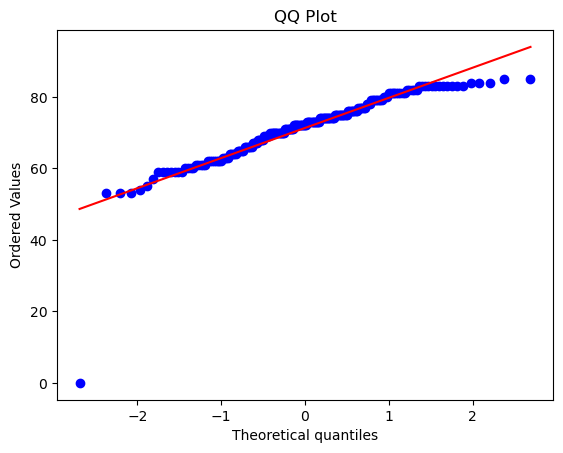

In [14]:
import scipy.stats as stats
#res = stats.probplot(df['Life Expectancy'], plot=plt)
res = stats.probplot(Group1, plot=plt)
plt.title("QQ Plot")
plt.show()

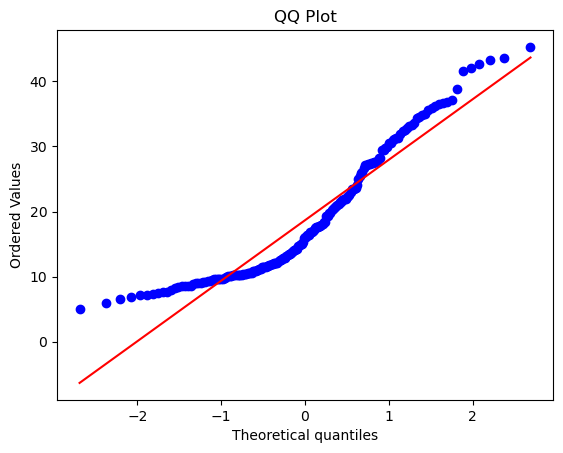

In [15]:
import scipy.stats as stats
#BR = df['Birth Rate']
res = stats.probplot(Group2, plot=plt)
plt.title("QQ Plot")
plt.show()

In [16]:
'''import scipy.stats as stats
#BR = df['Birth Rate']
res = stats.probplot(Group3, plot=plt)
plt.title("QQ Plot")
plt.show()'''

'import scipy.stats as stats\n#BR = df[\'Birth Rate\']\nres = stats.probplot(Group3, plot=plt)\nplt.title("QQ Plot")\nplt.show()'

In [17]:
'''import numpy as np
import scipy.stats as sts

#4th par: use 'mean' because samples follow normal distributions.
print(sts.levene(Group1, Group2, Group3,center='mean'))
print('p-value is greater than 5%, and thus accept null hypothesis of Levene test')'''

"import numpy as np\nimport scipy.stats as sts\n\n#4th par: use 'mean' because samples follow normal distributions.\nprint(sts.levene(Group1, Group2, Group3,center='mean'))\nprint('p-value is greater than 5%, and thus accept null hypothesis of Levene test')"

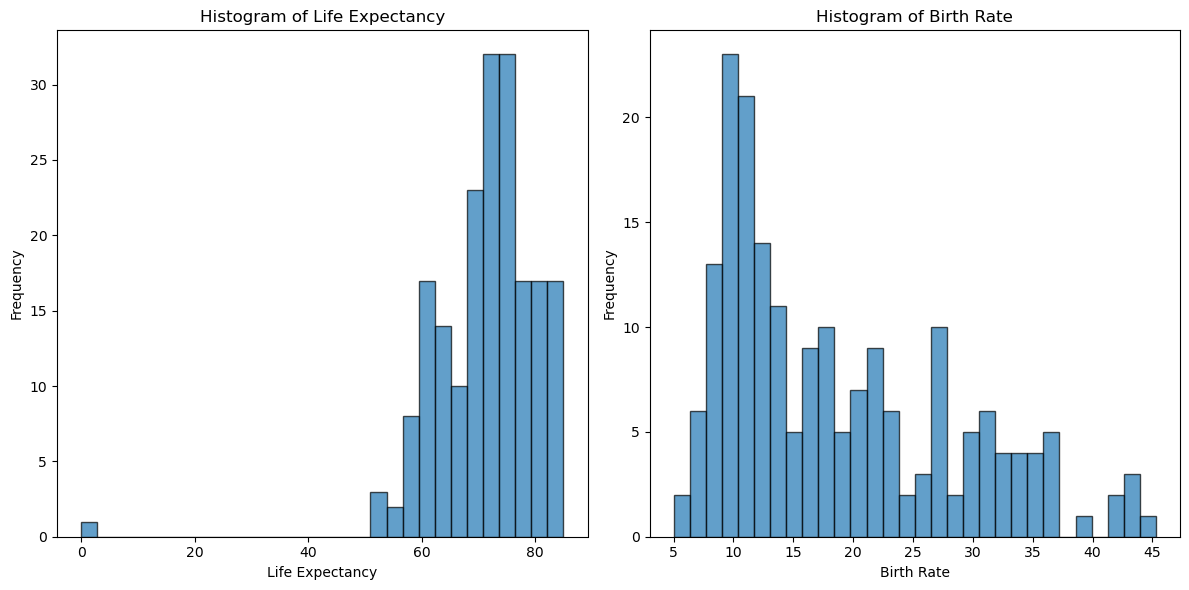

In [18]:
# Histogram for Life Expectancy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Life Expectancy'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

# Histogram for Birth Rate
plt.subplot(1, 2, 2)
plt.hist(df['Birth Rate'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Birth Rate')
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

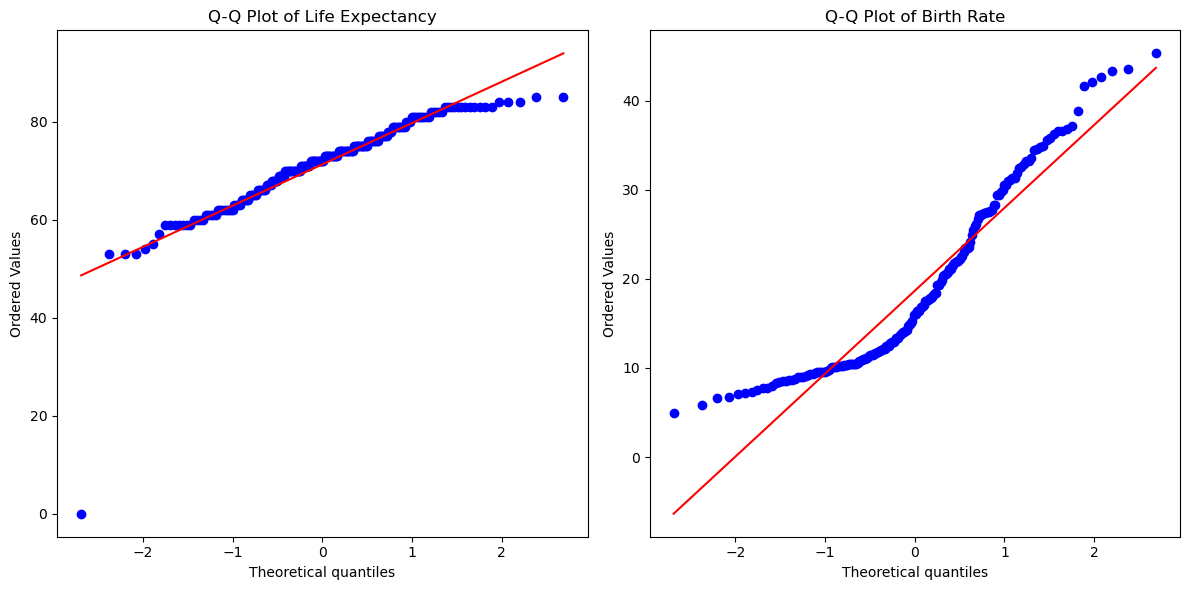

In [19]:

import scipy.stats as stats
# Q-Q plots
plt.figure(figsize=(12, 6))

# Q-Q plot for Life Expectancy
plt.subplot(1, 2, 1)
stats.probplot(df['Life Expectancy'], plot=plt)
plt.title('Q-Q Plot of Life Expectancy')

# Q-Q plot for Birth Rate
plt.subplot(1, 2, 2)
stats.probplot(df['Birth Rate'], plot=plt)
plt.title('Q-Q Plot of Birth Rate')
plt.tight_layout()
plt.show()

In [30]:
df = df[df['Country'] != 'Curacao']
print(df.describe())

       Life Expectancy  Birth Rate
count       192.000000  192.000000
mean         71.682292   18.712427
std           7.602569    9.660963
min          53.000000    5.000000
25%          66.000000   10.500000
50%          72.000000   16.059000
75%          77.000000   25.951750
max          85.000000   45.293000


In [31]:
from scipy import stats
z_scores = stats.zscore(df[['Life Expectancy', 'Birth Rate']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
df_outliers = df[outliers]
print(df_outliers)


Empty DataFrame
Columns: [Country, Life Expectancy, Birth Rate]
Index: []


In [22]:
median = df[['Life Expectancy', 'Birth Rate']].median()
mad = (df[['Life Expectancy', 'Birth Rate']] - median).abs().median()
modified_z_scores = 0.6745 * (df[['Life Expectancy', 'Birth Rate']] - median) / mad
outliers = (modified_z_scores.abs() > 3.5).all(axis=1)
df_outliers = df[outliers]
print(df_outliers)

Empty DataFrame
Columns: [Country, Life Expectancy, Birth Rate]
Index: []


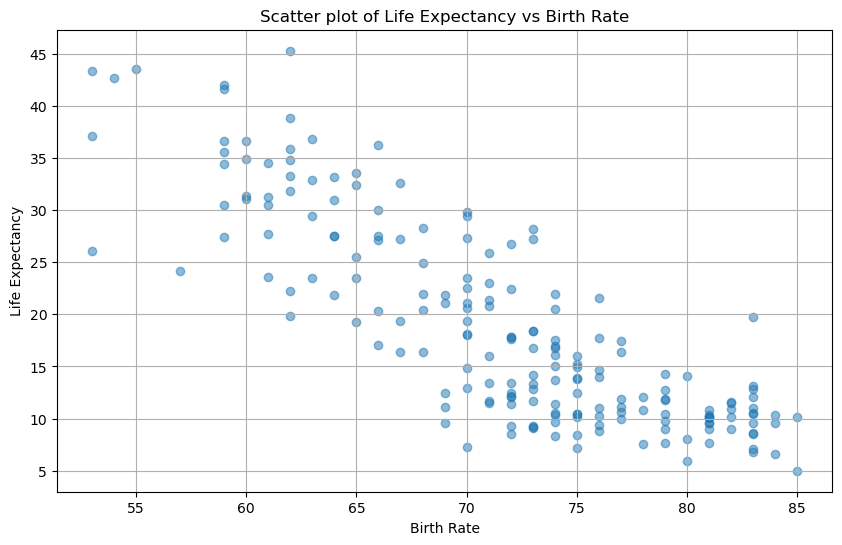

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(df["Life Expectancy"], df["Birth Rate"], alpha=0.5)

# Title and labels
plt.title("Scatter plot of Life Expectancy vs Birth Rate")
plt.xlabel("Birth Rate")
plt.ylabel("Life Expectancy")

# Show the plot
plt.grid(True)
plt.show()


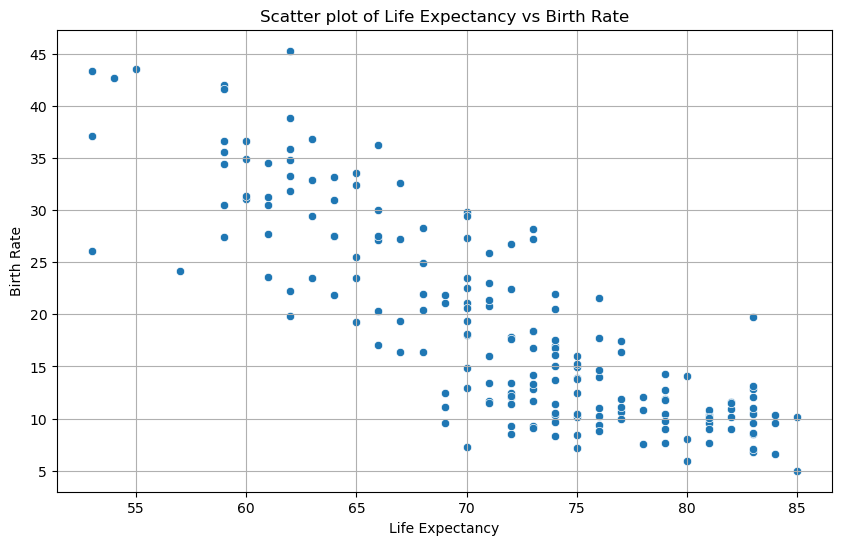

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Scatter plot with potential outliers
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Life Expectancy", y="Birth Rate")

plt.title("Scatter plot of Life Expectancy vs Birth Rate")
plt.grid(True)
plt.show()



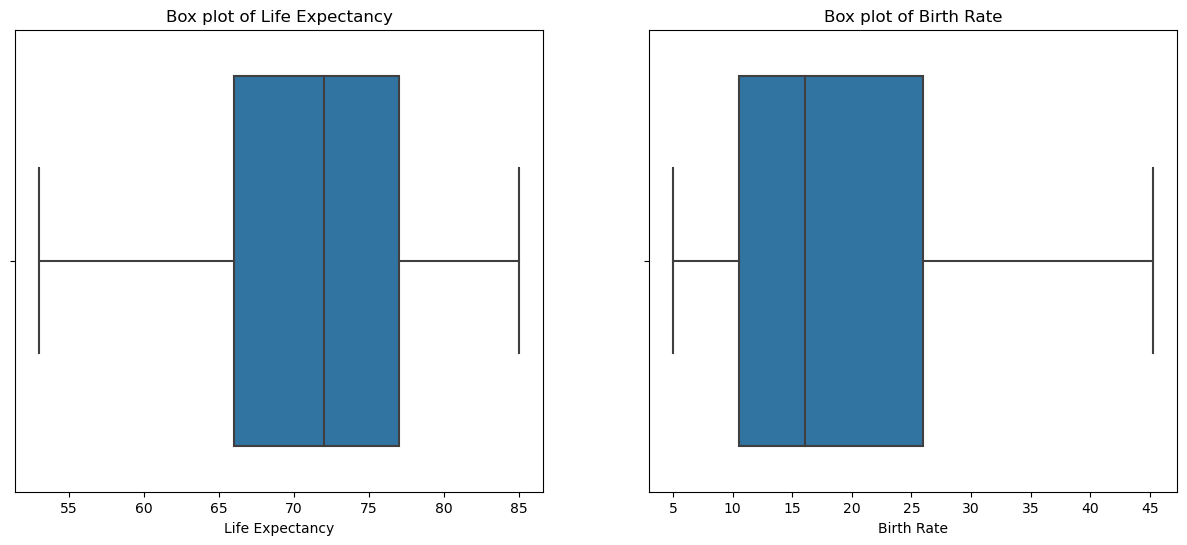

In [34]:
# Box plots to help visualize outliers for each variable
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Life Expectancy"])
plt.title("Box plot of Life Expectancy")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Birth Rate"])
plt.title("Box plot of Birth Rate")

plt.show()

In [37]:
import pandas as pd

def chebyshev_outliers(df, column_name, k=2):
    mean = df[column_name].mean()
    std = df[column_name].std()
    
    outliers = df[(df[column_name] < mean - k * std) | (df[column_name] > mean + k * std)]
    return outliers

outliers = chebyshev_outliers(df, 'Life Expectancy', k=3)
print(outliers)


Empty DataFrame
Columns: [Country, Life Expectancy, Birth Rate]
Index: []


In [41]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

# Suppose your data is stored in a DataFrame called df, with 'Life Expectancy' as the dependent variable 
# and 'Birth Rate' as the independent variable.
X = df['Birth Rate']
y = df['Life Expectancy']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create a model
model = OLS(y, X).fit()

# Calculate Durbin-Watson statistic
dw_statistic = sm.stats.durbin_watson(model.resid)
print("Durbin-Watson statistic:", dw_statistic)


Durbin-Watson statistic: 1.8255322951248159


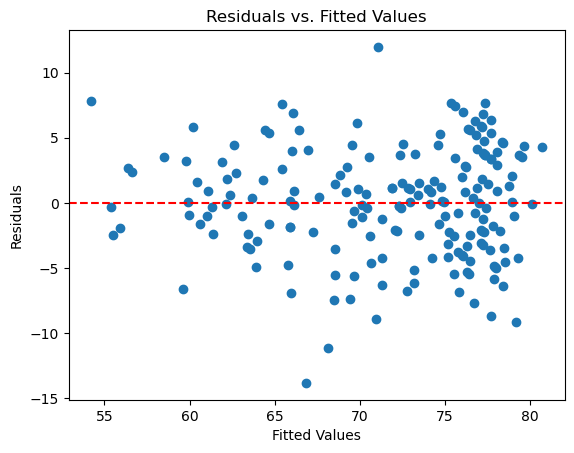

In [44]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming you have the model from the previous code
predicted_values = model.predict(X)
residuals = model.resid

plt.scatter(predicted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


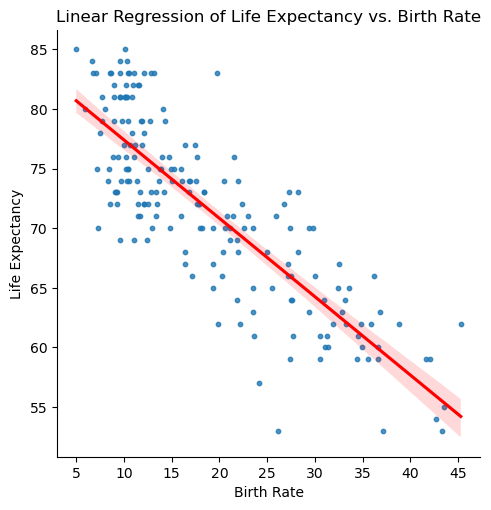

In [48]:
sns.lmplot(x='Birth Rate', y='Life Expectancy', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})

plt.title('Linear Regression of Life Expectancy vs. Birth Rate')
plt.show()